In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch
from torchvision import datasets
import torchvision.transforms as transforms
from model import Net
from sklearn import metrics

import utils

In [2]:
# Values can be "Validation" or "Test"
split_to_evaluate = "Validation" 

# Loading the model

In [3]:
model, labels_map, _ = utils.load_model("models/model.pt")

Loading model from models/model.pt ...
Model loaded!
Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=7, bias=True)
  (dropout20): Dropout(p=0.2, inplace=False)
)
Model trained until epoch 49 with learning rate 0.000100 and batch_size 128
Training Loss: 0.962436      	Validation Loss: 1.340161
Training Accuracy: 65.01%	Validation Accuracy: 49.15%
Training Precision: 67.18%	Validation Precision: 52.74%
Training Recall: 66.30%		Validation Recall: 50.12%


# Loading dataset data

In [4]:
if(split_to_evaluate == "Validation"):
    dataset_dir = "dataset/valid"
else:
    dataset_dir = "dataset/test"
num_workers = 0
batch_size = 128

In [5]:
data = datasets.ImageFolder(dataset_dir, transform=model.transform)

loader = torch.utils.data.DataLoader(data, batch_size=batch_size, num_workers=num_workers)

# Model Metrics

In [6]:
y_true, y_pred = utils.getModelPredicitons(model, loader)

In [7]:
set(y_true) - set(y_pred)

set()

## Metrics for all classes

In [8]:
total_accuracy = metrics.accuracy_score(y_true, y_pred) * 100.0
total_precision = metrics.precision_score(y_true, y_pred, average='macro') * 100.0
total_recall = metrics.recall_score(y_true, y_pred, average='macro') * 100.0
total_f1_score = metrics.f1_score(y_true, y_pred, average='macro') * 100.0

print(split_to_evaluate + " Accuracy:  %.2f%%" % (total_accuracy))
print(split_to_evaluate + " Precision: %.2f%%" % (total_precision))
print(split_to_evaluate + " Recall:    %.2f%%" % (total_recall))
print(split_to_evaluate + " F1 Score:  %.2f%%" % (total_f1_score))

Validation Accuracy:  49.15%
Validation Precision: 52.74%
Validation Recall:    50.12%
Validation F1 Score:  50.58%


# Metrics for each class

In [9]:
accuracy, class_correct, class_total = utils.getAccuracyPerClass(model, loader, num_classes=7)
precision = metrics.precision_score(y_true, y_pred, average=None) * 100.0
recall    = metrics.recall_score(y_true, y_pred, average=None) * 100.0
f1_score  = metrics.f1_score(y_true, y_pred, average=None) * 100.0

# Append total
accuracy  = np.append(accuracy, total_accuracy)
precision = np.append(precision, total_precision)
recall    = np.append(recall, total_recall)
f1_score  = np.append(f1_score, total_f1_score)

In [10]:
utils.printAccuracyPerClass(class_correct, class_total, labels_map, split_name=split_to_evaluate)

Validation accuracy of bicycle      38.78% (19/49)
Validation accuracy of bus          61.54% (24/39)
Validation accuracy of car          39.78% (37/93)
Validation accuracy of motorcycle   62.77% (59/94)
Validation accuracy of pickuptruck  68.00% (34/50)
Validation accuracy of truck        39.29% (33/84)
Validation accuracy of van          40.68% (24/59)


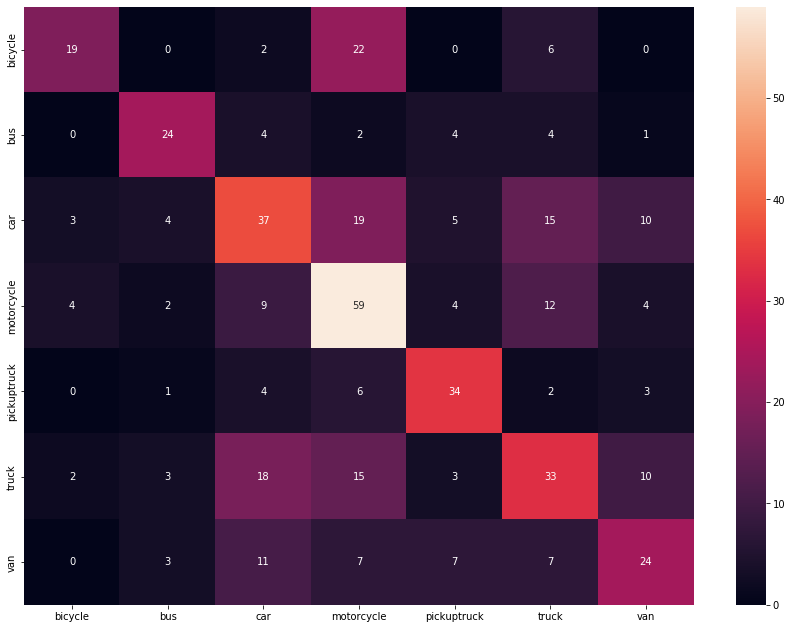

In [11]:
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
utils.plotConfusionMatrix(confusion_matrix, labels_map)

In [12]:
metrics = utils.getMetricsDataframe(accuracy, precision, recall, f1_score, labels_map)
display(metrics)

,Accuracy,Precision,Recall,F1-Score
bicycle,38.78%,67.86%,38.78%,49.35%
bus,61.54%,64.86%,61.54%,63.16%
car,39.78%,43.53%,39.78%,41.57%
motorcycle,62.77%,45.38%,62.77%,52.68%
pickuptruck,68.00%,59.65%,68.00%,63.55%
truck,39.29%,41.77%,39.29%,40.49%
van,40.68%,46.15%,40.68%,43.24%
Average,49.15%,52.74%,50.12%,50.58%
